# Produce the Solution

With the features created, we can now start to approach to the advanced analytics part. Based on the design, we would like to run a clustering on customers based on the features. A relatively standard way (especially when there are a large number of features) is to firstly do a PCA (Principal Component Analysis) to reduce dimension, and then run the clustering algorithm. For demonstration purpose, we will only show the KMeans ckustering part, users are encouraged to explore on PCA.

## App Development

The example of how to perform modelign exercises in jupyter notebook with pyspark has already been shown in Section I.Advanced Analytics of the tutorial with the employment data. Users can also defin a specific module in the source code part for the application (please see example codes in the airline project). Given we only have a small population, we will segment the customers into 3 clusters.

For demonstration purpose, we rewrite the codes below to run the KMeans Clustering.

In [1]:
import smv
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

In [2]:
all_feature = pdf("com.mycompany.airlineapp.feature.cmallfeat.CustomerAllFeatureTreat")

In [3]:
feature_list = ["cmcnt_seg_tvl_p1y", "cmcnt_lh_seg_tvl_p1y", "cmsum_rev_tvl_p1y", "cmint_age_now"]
vecAssembler = VectorAssembler(inputCols=feature_list, outputCol="features")
feature_sel = vecAssembler.transform(all_feature)

In [4]:
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(feature_sel)

## Model Evaluation

A model needs to be evaluated after development. For a supervised learning, metrics like ROC, AUC, R-squared could be calculated for different models to serve as part of the evaluation. In terms of unsupervised learning such as clustering, users can do some profiling on the predicted results as evaluation or validation of certain business assumptions.

In [5]:
# Check centers (means) of features for each cluster
model.clusterCenters()

[array([  2.57894737e+00,   3.68421053e-01,   5.01091578e+02,
          3.91606648e+01]),
 array([  3.17000000e+02,   8.80000000e+01,   6.17316860e+05,
          6.10000000e+01]),
 array([   32.5       ,     0.        ,  9028.62496948,    45.        ])]

In [6]:
# Segment customers into clusters
cluster = model.transform(feature_sel).cache()
cluster_pd = cluster.toPandas()

In [8]:
cluster_pd.head(22)

,CUST_ID,cmstr_tier_now,cmcnt_days_enroll_now,cmstr_gender_cd,cmcnt_seg_depdly_p1y,cmcnt_seg_depdly_l5s,cmdat_seg_tvl_last,cmpct_lh_seg_tvl_p1y,cmcnt_days_last_flt,cmstr_mf_dst_cd,...,cmind_tier0_now,cmind_tier1_now,cmind_tier2_now,cmind_tier3_now,cmint_age_now,cmcnt_seg_tvl_p1y,cmcnt_lh_seg_tvl_p1y,cmsum_rev_tvl_p1y,features,prediction
0,000544814415,0,72.0,F,NaN,NaN,NaT,NaN,NaN,None,...,1,0,0,0,38.000000,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 38.0)",0
1,000407811114,0,NaN,F,2.0,0.0,2014-04-28,0.066667,94.0,{u'ORD': 8},...,1,0,0,0,35.000000,15.0,1.0,1779.069992,"[15.0, 1.0, 1779.06999207, 35.0]",0
2,000876964176,1,NaN,NA,2.0,2.0,2014-07-29,0.500000,2.0,{u'SFO': 1},...,0,1,0,0,40.684211,4.0,2.0,1842.899979,"[4.0, 2.0, 1842.89997864, 40.6842105263]",0
3,000499804303,3,4896.0,M,3.0,3.0,2014-06-06,0.000000,55.0,"{u'MIA': 1, u'EWR': 1, u'ORD': 1, u'YVR': 1, u...",...,0,0,0,1,43.000000,7.0,0.0,671.590012,"[7.0, 0.0, 671.590011597, 43.0]",0
4,000163353775,1,57.0,F,0.0,0.0,2014-07-20,0.000000,11.0,{u'SFO': 1},...,0,1,0,0,24.000000,2.0,0.0,302.320007,"[2.0, 0.0, 302.320007324, 24.0]",0
5,000682324216,0,1805.0,M,NaN,NaN,NaT,NaN,NaN,None,...,1,0,0,0,33.000000,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 33.0)",0
6,000134299922,0,NaN,M,3.0,2.0,2014-07-31,0.000000,0.0,{u'ORD': 4},...,1,0,0,0,58.000000,14.0,0.0,6056.049973,"[14.0, 0.0, 6056.04997253, 58.0]",2
7,000365709222,5,11642.0,M,60.0,1.0,2014-07-31,0.277603,0.0,{u'ORD': 129},...,0,0,0,0,61.000000,317.0,88.0,617316.860115,"[317.0, 88.0, 617316.860115, 61.0]",1
8,000402848256,0,1.0,F,NaN,NaN,NaT,NaN,NaN,None,...,1,0,0,0,57.000000,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 57.0)",0
9,000531414908,0,4900.0,M,NaN,NaN,NaT,NaN,NaN,None,...,1,0,0,0,37.000000,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 37.0)",0


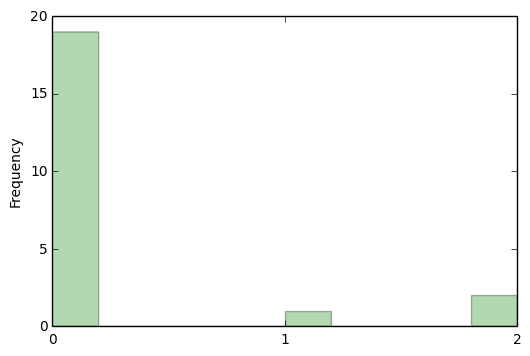

In [9]:
cluster_pd['prediction'].plot(kind='hist', xticks=[0,1,2], color='g', alpha=0.3)

## Smv Exercise 6: Modeling

Re-do clustering analyses:
1. Choose more features (including the ones created above, please pay more attention to specific treatments for newly added features in the analytic view)
2. Add a PCA step before KMeans. Example codes can be found in the example project, both python and scala versions are provided.